<a href="https://colab.research.google.com/github/Niki-33/IBM_Curso/blob/main/Grupo3_Solemne1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.decomposition import PCA
from IPython.display import display

In [ ]:
# Carga del dataset
data = pd.read_csv('/content/sample_data/winequality-red.csv')


In [ ]:
# Información del dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

In [ ]:
# Eliminar filas con valores faltantes
data_cleaned = data.dropna()


In [ ]:
# Ver la estructura del nuevo dataset
print(f"Estructura de data_cleaned:")
print(data_cleaned.info())

Estructura de data_cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
# Diagnóstico de variables numéricas
num_vars = data.select_dtypes(include=['float64', 'int64'])

num_summary = pd.DataFrame({
    'Variable': num_vars.columns,
    'Media': num_vars.mean(),
    'Desviación estándar': num_vars.std(),
    'Mínimo': num_vars.min(),
    'Máximo': num_vars.max(),
    'Valores únicos': num_vars.nunique(),
    'Valores nulos': num_vars.isnull().sum()
}).reset_index(drop=True)


# Mostrar como tabla
from IPython.display import display
display(num_summary)

,Variable,Media,Desviación estándar,Mínimo,Máximo,Valores únicos,Valores nulos
0,fixed acidity,8.319637,1.741096,4.60000,15.90000,96,0
1,volatile acidity,0.527821,0.179060,0.12000,1.58000,143,0
2,citric acid,0.270976,0.194801,0.00000,1.00000,80,0
3,residual sugar,2.538806,1.409928,0.90000,15.50000,91,0
4,chlorides,0.087467,0.047065,0.01200,0.61100,153,0
5,free sulfur dioxide,15.874922,10.460157,1.00000,72.00000,60,0
6,total sulfur dioxide,46.467792,32.895324,6.00000,289.00000,144,0
7,density,0.996747,0.001887,0.99007,1.00369,436,0
8,pH,3.311113,0.154386,2.74000,4.01000,89,0
9,sulphates,0.658149,0.169507,0.33000,2.00000,96,0


In [ ]:
# Tabla resumen estadística
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

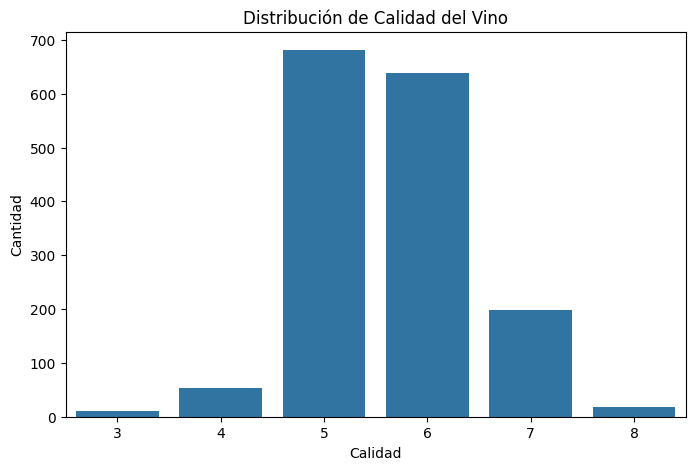

In [ ]:
#Gráfico de barras para variable categórica (quality)
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data)
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()

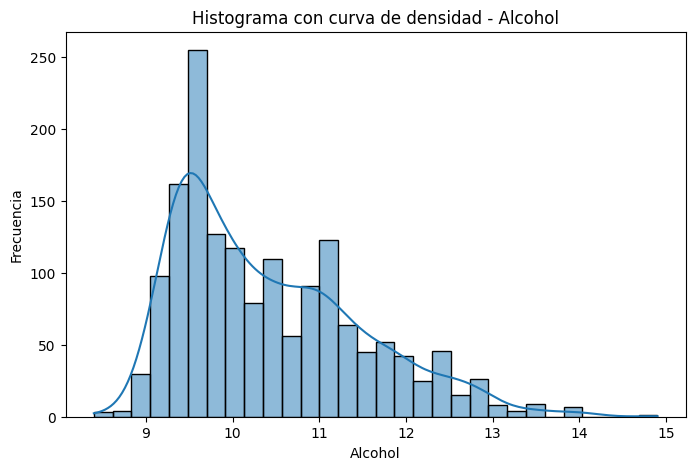

In [ ]:
# Histograma con curva de densidad (alcohol)
plt.figure(figsize=(8, 5))
sns.histplot(data['alcohol'], kde=True, bins=30)
plt.title('Histograma con curva de densidad - Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.show()

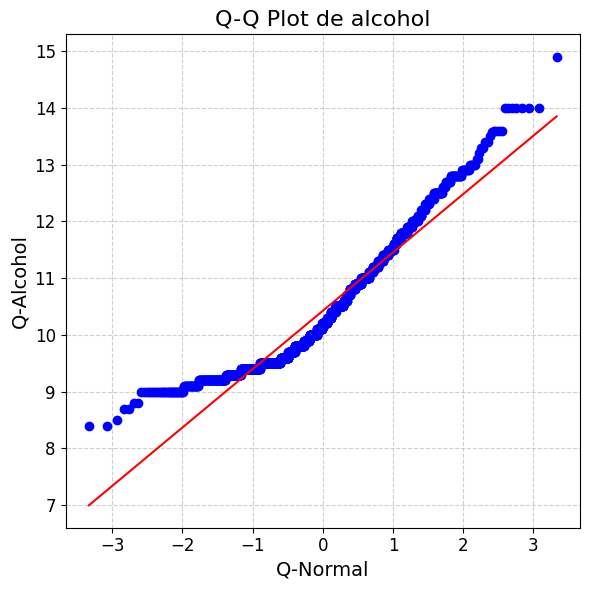

In [ ]:
# Q-Q plot para la variable alcohol
plt.figure(figsize=(6, 6))
stats.probplot(data['alcohol'], dist="norm", plot=plt) # pd.DataFrame_df['mpg'] data['alcohol']

plt.title("Q-Q Plot de alcohol", fontsize=16)
plt.xlabel("Q-Normal", fontsize=14)
plt.ylabel("Q-Alcohol", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Pruebas de bondad de ajuste
# Ho: la distribución es normal
# H1: no tiene distribución normal


# Prueba de Shapiro-Wilk para la variable alcohol EJEMPLO
stat, p_value = shapiro(data['alcohol'])  # Usando 'alcohol' column from 'data'
print("Shapiro-Wilk Test para 'alcohol'")
print(f"Estadístico = {stat:.4f}, p-valor = {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza Ho: La variable 'alcohol' podría tener distribución normal.")
else:
    print("Se rechaza Ho: La variable 'alcohol' no sigue una distribución normal.")

# Evaluar normalidad para todas las variables numéricas en 'data'
num_vars = data.select_dtypes(include=['float64', 'int64'])

normality_results = []
for col in num_vars.columns:
    stat, p = shapiro(num_vars[col])
    normality_results.append({
        'Variable': col,
        'Estadístico': round(stat, 4),
        'p-valor': round(p, 4),
        'Normal (p > 0.05)': 'Sí' if p > 0.05 else 'No'
    })

normality_df = pd.DataFrame(normality_results)
display(normality_df)

Shapiro-Wilk Test para 'alcohol'
Estadístico = 0.9288, p-valor = 0.0000
Se rechaza Ho: La variable 'alcohol' no sigue una distribución normal.


,Variable,Estadístico,p-valor,Normal (p > 0.05)
0,fixed acidity,0.9420,0.0,No
1,volatile acidity,0.9743,0.0,No
2,citric acid,0.9553,0.0,No
3,residual sugar,0.5661,0.0,No
4,chlorides,0.4842,0.0,No
5,free sulfur dioxide,0.9018,0.0,No
6,total sulfur dioxide,0.8732,0.0,No
7,density,0.9909,0.0,No
8,pH,0.9935,0.0,No
9,sulphates,0.8330,0.0,No


In [ ]:
# Detección de valores atípicos usando el criterio IQR
# LS = Q3 + 1.5 * IQR
# LI = Q1 - 1.5 * IQR

outlier_summary = []

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr
    outliers = data[(data[col] < li) | (data[col] > ls)][col]
    outlier_summary.append({
        'Variable': col,
        'Q1': round(q1, 2),
        'Q3': round(q3, 2),
        'IQR': round(iqr, 2),
        'Límite Inferior': round(li, 2),
        'Límite Superior': round(ls, 2),
        'Cantidad de Outliers': outliers.count()
    })


outliers_df = pd.DataFrame(outlier_summary)
display(outliers_df)

,Variable,Q1,Q3,IQR,Límite Inferior,Límite Superior,Cantidad de Outliers
0,fixed acidity,7.10,9.20,2.10,3.95,12.35,49
1,volatile acidity,0.39,0.64,0.25,0.02,1.02,19
2,citric acid,0.09,0.42,0.33,-0.40,0.91,1
3,residual sugar,1.90,2.60,0.70,0.85,3.65,155
4,chlorides,0.07,0.09,0.02,0.04,0.12,112
5,free sulfur dioxide,7.00,21.00,14.00,-14.00,42.00,30
6,total sulfur dioxide,22.00,62.00,40.00,-38.00,122.00,55
7,density,1.00,1.00,0.00,0.99,1.00,45
8,pH,3.21,3.40,0.19,2.92,3.68,35
9,sulphates,0.55,0.73,0.18,0.28,1.00,59


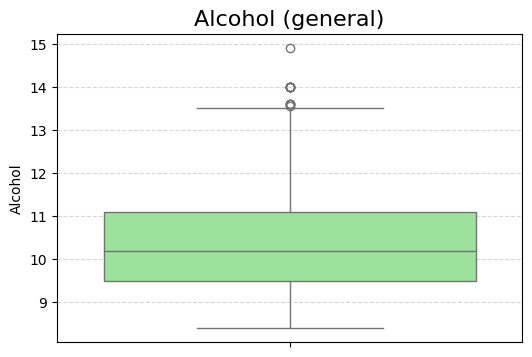

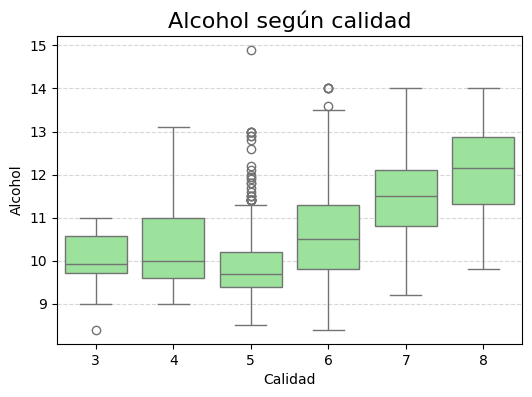

In [ ]:
## Ahora en forma de gráficos

# Boxplot 1: alcohol (general)
plt.figure(figsize=(6, 4))
sns.boxplot(y='alcohol', data=data, color='lightgreen')
plt.title('Alcohol (general)', fontsize=16)
plt.ylabel('Alcohol')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Boxplot 2: alcohol por calidad (quality)
plt.figure(figsize=(6, 4))
sns.boxplot(x='quality', y='alcohol', data=data, color='lightgreen')
plt.title('Alcohol según calidad', fontsize=16)
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

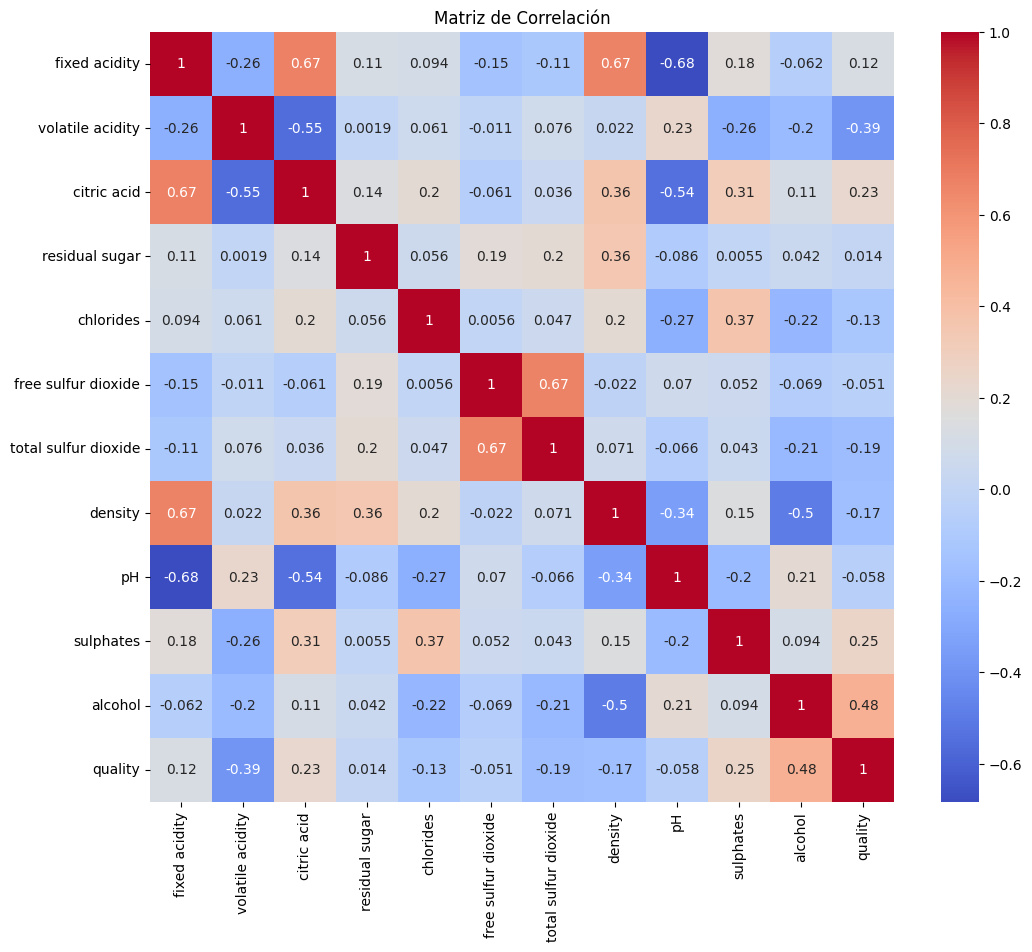

In [ ]:
# Identificación de correlaciones
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Matriz de correlación (Spearman):
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.28         0.66   
volatile acidity              -0.28              1.00        -0.61   
citric acid                    0.66             -0.61         1.00   
residual sugar                 0.22              0.03         0.18   
chlorides                      0.25              0.16         0.11   
free sulfur dioxide           -0.18              0.02        -0.08   
total sulfur dioxide          -0.09              0.09         0.01   
density                        0.62              0.03         0.35   
pH                            -0.71              0.23        -0.55   
sulphates                      0.21             -0.33         0.33   
alcohol                       -0.07             -0.22         0.10   
quality                        0.11             -0.38         0.21   

                      residual sugar  chlorides  free s

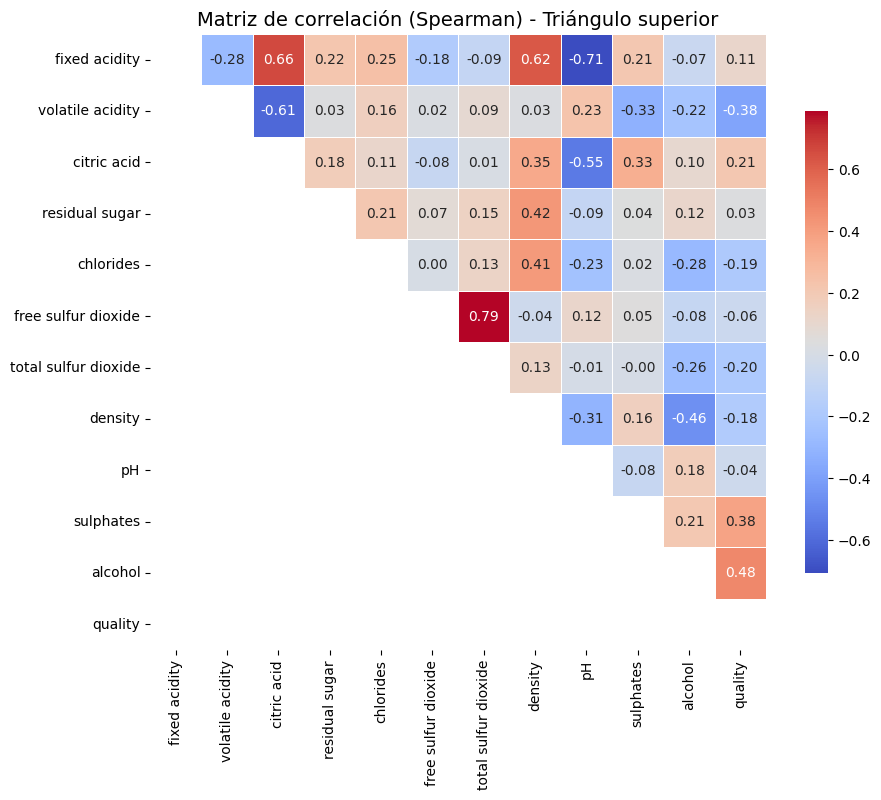

In [ ]:
# MATRIZ DE CORRELACION

# En este análisis:
# - Se calcula la matriz de correlación usando el método de Spearman, que es robusto frente a datos que no siguen distribución normal.
# - Se elimina 'vs' y 'am' porque son variables categóricas y no aplican para correlación numérica.
# - El heatmap muestra solo el triángulo superior para evitar duplicados.
# - La función pairplot entrega gráficos de dispersión entre todas las variables junto con histogramas univariados.
#   Muy útil para observar relaciones no lineales y posibles agrupaciones.

# Define 'cols_to_use' selecting the desired numeric columns from your DataFrame 'data'
cols_to_use = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol', 'quality']] # Example: Replace with your desired columns

# Calculamos la matriz de correlación usando el método de Spearman (rango)
cor_matrix = cols_to_use.corr(method='spearman')

# Mostramos los resultados redondeados a 2 decimales
print("Matriz de correlación (Spearman):")
print(cor_matrix.round(2))

# Mapa de calor tipo 'corrplot' con el triángulo superior y sin la diagonal
mask = np.tril(np.ones_like(cor_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Matriz de correlación (Spearman) - Triángulo superior", fontsize=14)
plt.show()

In [ ]:
# Modelo de regresión lineal múltiple

# Se utiliza el método OLS (Ordinary Least Squares) de statsmodels.
# Finalmente, se presenta una tabla con:
# - Estimaciones de los coeficientes
# - Error estándar
# - Valor t
# - p-valor para pruebas de significancia individual de cada variable



# Definir variables independientes (X) y dependiente (y)
# Changed 'df' to 'data' to use the correct DataFrame
X = data.drop(columns='quality')
y = data['quality']

# Agregar constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Crear tabla de coeficientes manualmente desde el modelo
coef_table = pd.DataFrame({
    'Variables': modelo.params.index,
    'Estimación': modelo.params.values,
    'Std.Error': modelo.bse,
    't.value': modelo.tvalues,
    'P-valor': modelo.pvalues
})

# Redondear y mostrar
coef_table = coef_table.round(4)
display(coef_table)

,Variables,Estimación,Std.Error,t.value,P-valor
const,const,21.9652,21.1946,1.0364,0.3002
fixed acidity,fixed acidity,0.0250,0.0259,0.9631,0.3357
volatile acidity,volatile acidity,-1.0836,0.1211,-8.9478,0.0000
citric acid,citric acid,-0.1826,0.1472,-1.2404,0.2150
residual sugar,residual sugar,0.0163,0.0150,1.0886,0.2765
chlorides,chlorides,-1.8742,0.4193,-4.4701,0.0000
free sulfur dioxide,free sulfur dioxide,0.0044,0.0022,2.0086,0.0447
total sulfur dioxide,total sulfur dioxide,-0.0033,0.0007,-4.4798,0.0000
density,density,-17.8812,21.6331,-0.8266,0.4086
pH,pH,-0.4137,0.1916,-2.1590,0.0310


In [ ]:
r2_ajustado = modelo.rsquared_adj * 100
print(f"R² ajustado: {r2_ajustado:.2f}%")


R² ajustado: 35.61%


Intervalos de confianza al 95% para los coeficientes:


,Límite Inferior,Límite Superior
Variables,,
const,-19.6071,63.5375
fixed acidity,-0.0259,0.0759
volatile acidity,-1.3211,-0.8461
citric acid,-0.4712,0.1061
residual sugar,-0.0131,0.0458
chlorides,-2.6966,-1.0518
free sulfur dioxide,0.0001,0.0086
total sulfur dioxide,-0.0047,-0.0018
density,-60.3136,24.5513


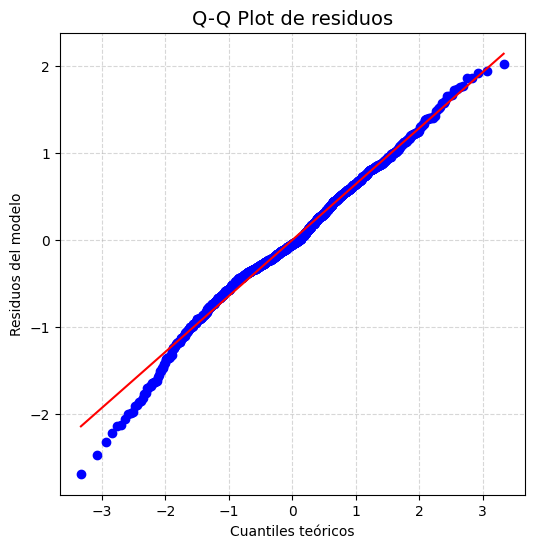

Shapiro-Wilk: estadístico = 0.9909, p-valor = 0.0000
→ Se rechaza Ho: los residuos no siguen una distribución normal.
Resumen estadístico de los residuos:


,0
count,1599.0000
mean,-0.0000
std,0.6458
min,-2.6891
25%,-0.3665
50%,-0.0470
75%,0.4520
max,2.0250


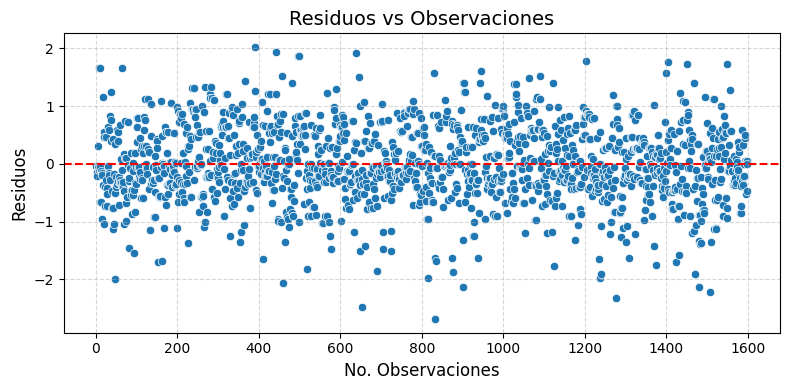

In [ ]:
# - Se evalúan los residuos del modelo para comprobar la validez de los supuestos.
# - El Q-Q plot permite ver si los residuos se distribuyen normalmente.
# - La prueba de Shapiro-Wilk lo confirma estadísticamente.
# - El gráfico de residuos vs observaciones permite detectar patrones no aleatorios.
# - Los intervalos de confianza ayudan a interpretar la incertidumbre de los coeficientes.
#


# 1. Intervalos de confianza para los coeficientes
# confint() en R → conf_int en statsmodels
conf_int = modelo.conf_int()
conf_int.columns = ['Límite Inferior', 'Límite Superior']
conf_int.index.name = 'Variables'
print("Intervalos de confianza al 95% para los coeficientes:")
display(conf_int.round(4))

# 2. Q-Q plot para los residuos del modelo
residuos = modelo.resid

plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de residuos", fontsize=14)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Residuos del modelo")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Prueba de normalidad de Shapiro-Wilk para los residuos
stat, p = stats.shapiro(residuos)
print(f"Shapiro-Wilk: estadístico = {stat:.4f}, p-valor = {p:.4f}")
if p > 0.05:
    print("→ No se rechaza Ho: los residuos parecen seguir una distribución normal.")
else:
    print("→ Se rechaza Ho: los residuos no siguen una distribución normal.")

# 4. Resumen estadístico de los residuos
print("Resumen estadístico de los residuos:")
display(residuos.describe().round(4))

# 5. Gráfico de residuos vs número de observación
df_residuos = pd.DataFrame({
    'obs': np.arange(1, len(residuos) + 1),
    'resid': residuos
})

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_residuos, x='obs', y='resid')
plt.axhline(0, color='red', linestyle='dashed')
plt.title("Residuos vs Observaciones", fontsize=14)
plt.xlabel("No. Observaciones", fontsize=12)
plt.ylabel("Residuos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Se ajusta un nuevo modelo solo con esas variables y se muestran los coeficientes con su inferencia estadística.


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


X = data.drop(columns='quality')
y = data['alcohol']

# 2. Eliminación hacia atrás con RFE (Recursive Feature Elimination)

modelo_sklearn = LinearRegression()
selector = RFE(modelo_sklearn, n_features_to_select=5)  # puedes ajustar el número de variables
selector = selector.fit(X, y)

# 3. Seleccionar las variables elegidas
X_reducido = X.loc[:, selector.support_]

# 4. Ajustar modelo final con statsmodels para obtener coeficientes y p-valores
X_reducido = sm.add_constant(X_reducido)
modelo_final = sm.OLS(y, X_reducido).fit()

# 5. Tabla con coeficientes como en R
coef_table = pd.DataFrame({
    'Variables': modelo_final.params.index,
    'Estimación': modelo_final.params.values,
    'Std.Error': modelo_final.bse,
    't.value': modelo_final.tvalues,
    'P-valor': modelo_final.pvalues
}).round(4)

display(coef_table)

,Variables,Estimación,Std.Error,t.value,P-valor
const,const,0.0,0.0,4.080000e-02,0.9674
volatile acidity,volatile acidity,0.0,0.0,1.400000e-02,0.9888
residual sugar,residual sugar,0.0,0.0,1.230000e-02,0.9902
chlorides,chlorides,-0.0,0.0,-9.900000e-03,0.9921
density,density,0.0,0.0,1.740000e-02,0.9862
alcohol,alcohol,1.0,0.0,2.466326e+13,0.0000


# **Entrenamiento de modelo inicial**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve
)
import statsmodels.api as sm

# Convertir la columna 'quality' en bueno y malo, segun 1 y 0, rango de datos del 0 al 4 malo (0) y del 5 al 10 bueno (1)
data['quality_2'] = np.where(data['quality'] >= 5, 1, 0)

data['quality_2'] = data['quality_2'].astype('category')


data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:

X = data.drop(columns='quality_2')
y = data['quality_2'].cat.codes  # 0 = tested_negative, 1 = tested_positive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


### EVALUACION DE MODELO 1

In [ ]:

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Variables seleccionadas manualmente con menos correlacion
variables = ['fixed acidity', 'chlorides', 'pH']
model1 = sm.Logit(y_train, X_train_const[["const"] + variables]).fit()
model1.summary()


Optimization terminated successfully.
         Current function value: 0.150385
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1275
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                 0.04497
Time:                        04:51:54   Log-Likelihood:                -192.34
converged:                       True   LL-Null:                       -201.40
Covariance Type:            nonrobust   LLR p-value:                 0.0004170
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.1699      5.179      3.702      0.000       9.020      29.320
fixed acidity    -0.0853      0.130     -0.656      0.512      -0.340       0.169
chlorides        -6.7009      2.272     -2.949      0.003     -11.154      -2.248
pH               -4.3585      1.277     -3.413      0.001      -6.861      -1.856
=================================================================================
"""

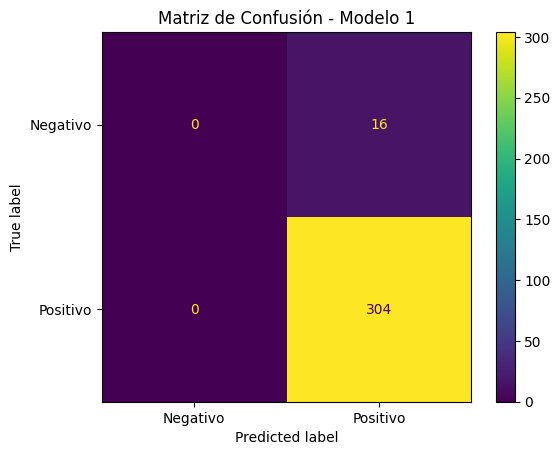

Métricas del Modelo 1:
Accuracy : 0.9500
Precision: 0.9500
Recall   : 1.0000
F1 Score : 0.9744
AUC      : 0.6100

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.95      1.00      0.97       304

    accuracy                           0.95       320
   macro avg       0.47      0.50      0.49       320
weighted avg       0.90      0.95      0.93       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

y_pred_prob1 = model1.predict(X_test_const[["const"] + variables])
y_pred1 = (y_pred_prob1 > 0.5).astype(int)

# Matriz de confusión
cm1 = confusion_matrix(y_test, y_pred1)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=['Negativo', 'Positivo'])
disp1.plot()
plt.title("Matriz de Confusión - Modelo 1")
plt.show()

# Métricas
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
auc = roc_auc_score(y_test, y_pred_prob1)

print("Métricas del Modelo 1:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred1))

MODELO 2

In [ ]:

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Variables seleccionadas manualmente todas
variables = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
model2 = sm.Logit(y_train, X_train_const[["const"] + variables]).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.138874
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1270
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.1181
Time:                        04:51:54   Log-Likelihood:                -177.62
converged:                       True   LL-Null:                       -201.40
Covariance Type:            nonrobust   LLR p-value:                 1.200e-07
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2092      2.485      0.889      0.374      -2.661       7.079
fixed acidity            0.2163      0.149      1.449      0.147      -0.076       0.509
volatile acidity        -4.6135      0.929     -4.964      0.000      -6.435      -2.792
citric acid             -0.8826      1.390     -0.635      0.525      -3.607       1.842
residual sugar          -0.1874      0.089     -2.104      0.035      -0.362      -0.013
chlorides               -2.4405      2.629     -0.928      0.353      -7.594       2.713
free sulfur dioxide      0.0043      0.024      0.181      0.857      -0.043       0.051
total sulfur dioxide     0.0171      0.009      1.914      0.056      -0.000       0.035
alcohol                  0.2158      0.181      1.192      0.233      -0.139       0.571
========================================================================================
"""

EVALUACION MODELO 2

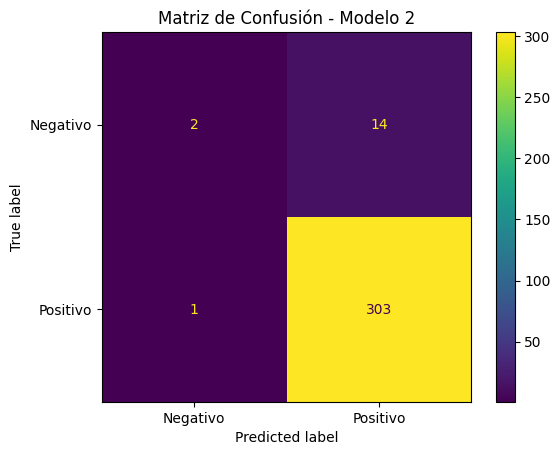

Métricas del Modelo 2:
Accuracy : 0.9531
Precision: 0.9558
Recall   : 0.9967
F1 Score : 0.9758
AUC      : 0.8882

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.12      0.21        16
           1       0.96      1.00      0.98       304

    accuracy                           0.95       320
   macro avg       0.81      0.56      0.59       320
weighted avg       0.94      0.95      0.94       320



In [ ]:

y_pred_prob2 = model2.predict(X_test_const[["const"] + variables])
y_pred2 = (y_pred_prob2 > 0.5).astype(int)

# Matriz de confusión
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=['Negativo', 'Positivo'])
disp2.plot()
plt.title("Matriz de Confusión - Modelo 2")
plt.show()

# Métricas
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred_prob2)

print("Métricas del Modelo 2:")
print(f"Accuracy : {acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall   : {rec2:.4f}")
print(f"F1 Score : {f1_2:.4f}")
print(f"AUC      : {auc2:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred2))

MODELO 3

In [ ]:

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Variables seleccionadas manualmente con mas correlacion
variables = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'pH', 'sulphates']
model3 = sm.Logit(y_train, X_train_const[["const"] + variables]).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.139901
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1273
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.1115
Time:                        04:51:55   Log-Likelihood:                -178.93
converged:                       True   LL-Null:                       -201.40
Covariance Type:            nonrobust   LLR p-value:                 1.498e-08
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.2401      3.937      3.617      0.000       6.524      21.956
volatile acidity        -4.6051      0.899     -5.120      0.000      -6.368      -2.842
citric acid             -1.4441      1.133     -1.275      0.202      -3.665       0.777
total sulfur dioxide     0.0132      0.006      2.230      0.026       0.002       0.025
pH                      -2.5820      1.097     -2.354      0.019      -4.732      -0.432
sulphates                0.2991      1.214      0.246      0.805      -2.080       2.679
========================================================================================
"""

EVALUACION MODELO 3


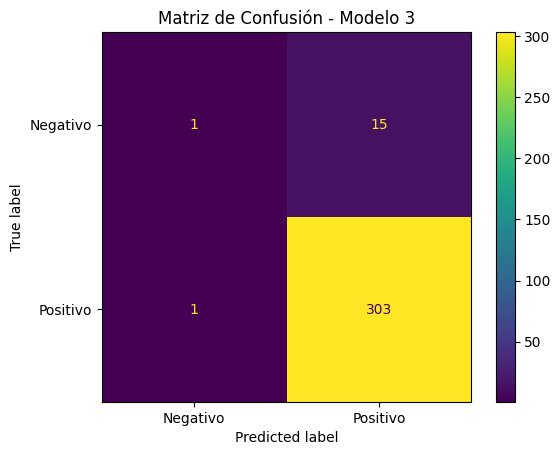

Métricas del Modelo 3:
Accuracy : 0.9500
Precision: 0.9528
Recall   : 0.9967
F1 Score : 0.9743
AUC      : 0.9023

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.95      1.00      0.97       304

    accuracy                           0.95       320
   macro avg       0.73      0.53      0.54       320
weighted avg       0.93      0.95      0.93       320



In [ ]:

y_pred_prob3 = model3.predict(X_test_const[["const"] + variables])
y_pred3 = (y_pred_prob3 > 0.5).astype(int)

# Matriz de confusión
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(cm3, display_labels=['Negativo', 'Positivo'])
disp3.plot()
plt.title("Matriz de Confusión - Modelo 3")
plt.show()

# Métricas
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred_prob3)

print("Métricas del Modelo 3:")
print(f"Accuracy : {acc3:.4f}")
print(f"Precision: {prec3:.4f}")
print(f"Recall   : {rec3:.4f}")
print(f"F1 Score : {f1_3:.4f}")
print(f"AUC      : {auc3:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred3))

CURVAS ROC DE EVALUACION DE MODELOS 1, 2 Y 3


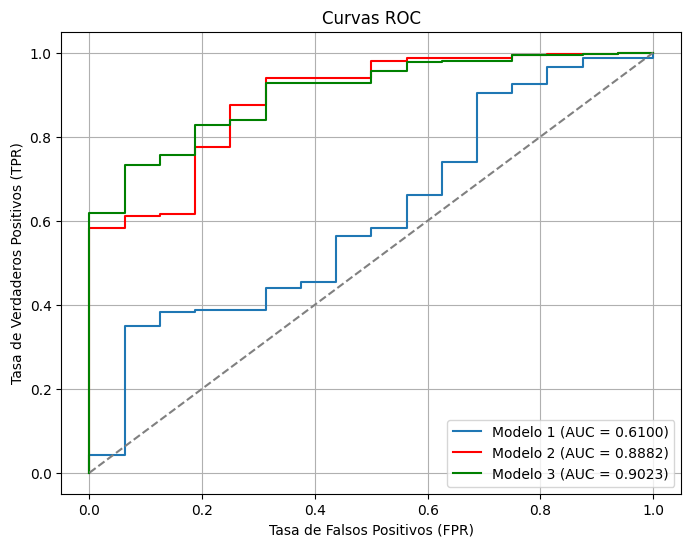

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob3)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, label=f"Modelo 1 (AUC = {auc:.4f})")
plt.plot(fpr2, tpr2, label=f"Modelo 2 (AUC = {auc2:.4f})", color='red')
plt.plot(fpr3, tpr3, label=f"Modelo 3 (AUC = {auc3:.4f})", color='green')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC")
plt.legend()
plt.grid(True)
plt.show()